<a href="https://colab.research.google.com/github/dandersonghub/Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

Project Overview

This project demonstrates how Python and its various libraries can be utilized to generate plots, charts, and other impactful data visualizations.


##What is Data Visualization?

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.
## Objective

*   Explore and analyze datasets to reveal graphical trends and insights

##Datasets: 
1.International migration flow dataset that contains annual data on the flow of international migrants from countries all over the world from United Nation's website.

2.New Orleans Vacation Rentals (Hotels, B&B, short-term rentals, etc.) A merged dataset of the Hotels, Motels, B&Bs, and Boarding Houses and the Short-Term Rentals in New Orleans, Louisiana.



## Table of Contents

1.  [Import Data](#import)
2.  [Line Plots](#lp)
3.  [Area Plots](#ap)
4.  [Histograms](#his)
5.  [Bar Charts](#bc)
6.  [Pie Charts](#pc)
7.  [Box Plots](#bp)
8.  [Scatter Plots](#sp)
9.  [Bubble Plots](#bp)
10. [Generating Maps](#gmap)











## Import Data <a name="import"></a>


Import libraries:


In [1]:
# Pandas is a library for data management, manipulation, and analysis 
# Matplotlib is a library for making visualizations
# Numpy is a library for working with arrays of data
# Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import folium

Load the data and store it in dataframe `df`:


In [2]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

In [3]:
# Use info() method to view short summary of dataframe
# This dataframe contains 43 columns and 195 rows of data
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


Based on the data preview below, we can see the dataframe contains annual immigration data by country, region, and continent, from 1980 - 2013.  

In [4]:
# View the first 5 rows of dataframe
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Drop unneccessary columns from dataframe 
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [6]:
# Rename columns for clarity
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [7]:
# Add 'Total' column to summarize total annual immigration counts across all data years (1980-2013)
df['Total'] = df.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
# Index dataframe by immigration country
df.set_index('Country', inplace=True)
# Create variable to sum data years for plotting
years = list(map(str, range(1980, 2014)))

In [9]:
# Convert columns representing data years into strings
df.columns = list(map(str, df.columns))

In [10]:
# Display first 5 rows of final dataframe to review changes to columns and begin data visualizations
df.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
# Create list of columns in dataframe to ensure additions are correctly assigned
df.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

## Line Plots <a name="lp"></a>


Line plots organize the data by indicating the occurrences of each value on a number line. Line plots are used to display numerical, discrete data only.

**Question:** What 5 countries had the most immigration?

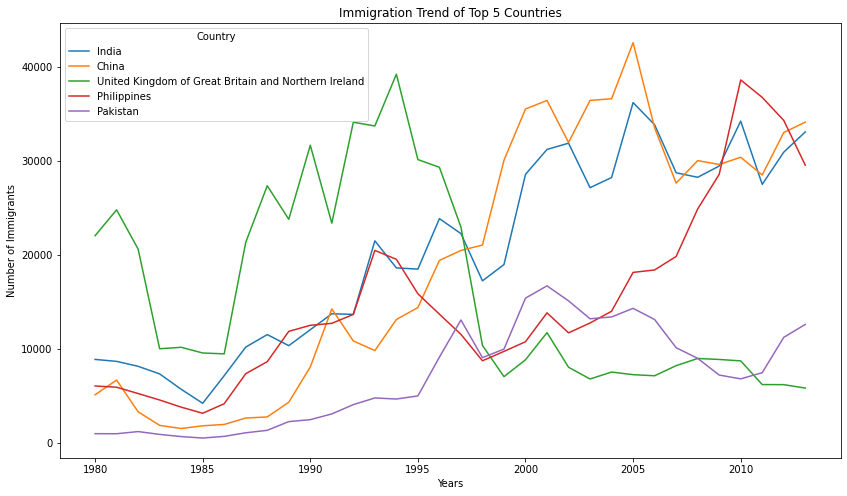

In [12]:
# Sort values to get list of top 5 countries
inplace = True 
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 


#Plot the dataframe
df_top5.plot(kind='line', figsize=(14, 8))


plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

India, China, UK, Philippines, and Pakistan contributed the most to immigration from 1980-2013. The UK displays the most drastic decline in immigration starting around 1994 and lasting for years.

## Area Plots <a name="ap"></a>


Area plots are used in tracking the changes over time for two or more related groups that make one whole category.

**Question:** What are the immigration trends for the top 3 countries?

Text(0.5, 0, 'Years')

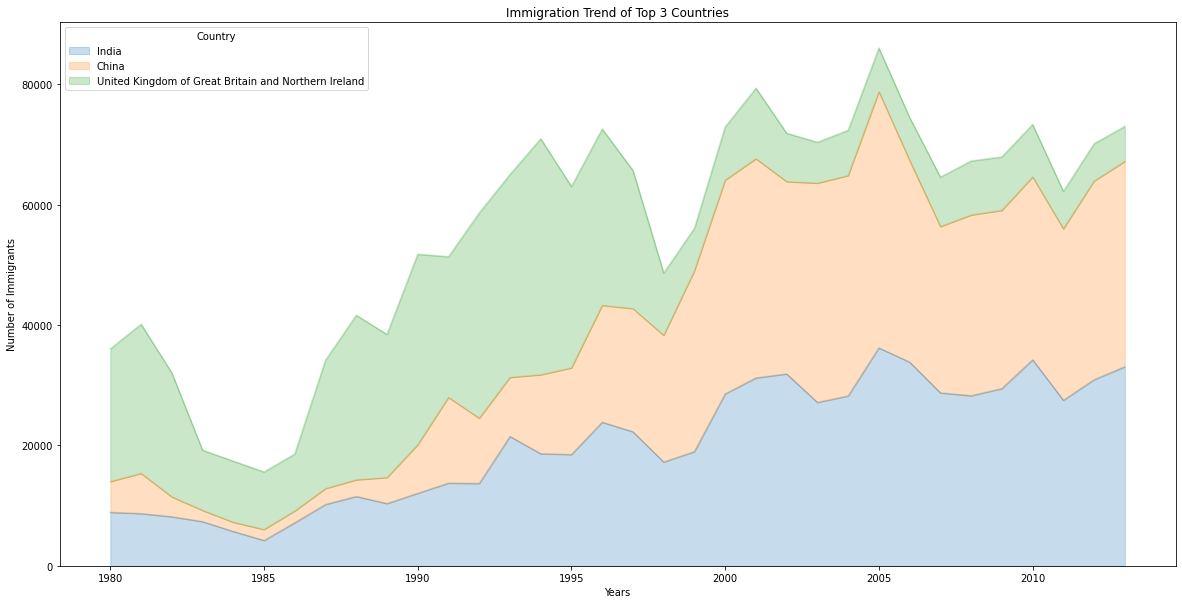

In [13]:
# Creating dataframe with top 3 countries
df_top3 = df.head(3)
df_top3

df_top3 = df_top3[years].transpose()

# Plot dataframe
ax = df_top3.plot(kind='area', alpha=0.25, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 3 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

The above graphic displays a stacked area plot of the top 3 immigration countries and their increasing trends over time.

## Histograms <a name="his"></a>


A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.

**Question:** What is the immigration distribution for Denmark, Norway, and Sweden for years 1980-2013?

In [14]:
# create dataframe for top 3 countries
df_t = df.loc[['Denmark', 'Norway','Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


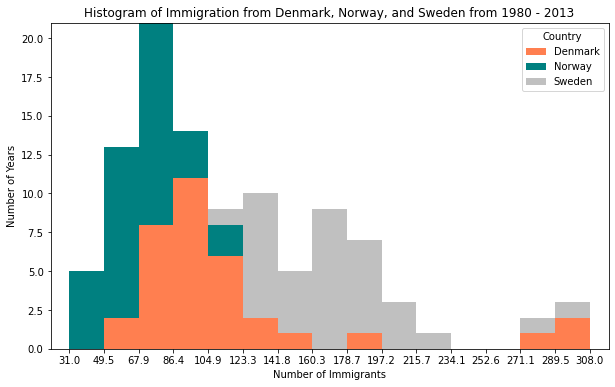

In [15]:
# Create bins for data and plot stacked histogram
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10    
xmax = bin_edges[-1] + 10  

df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'teal', 'silver'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

Comparing the 3 countries above, Sweden has the most immigrants, then Denmark, and Norway.

## Bar Charts <a name="bc"></a>


Bar charts are used in data comparison where we can measure the changes over a period of time.

**Question:** Compare the number of USA immigrants from 1980-2013.

In [16]:
# create USA specific dataframe
df_USA = df.loc['United States of America', years]
df_USA.head()

1980     9378
1981    10030
1982     9074
1983     7100
1984     6661
Name: United States of America, dtype: object

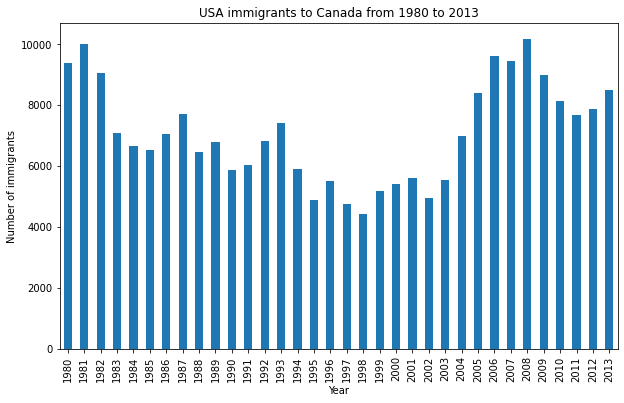

In [17]:
# plot data using a bar chart
df_USA.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('USA immigrants to Canada from 1980 to 2013') 

plt.show()

After years of USA immigration declines, the number of immigrations started increasing rapidly after 2003.Then, after 2008 immigrations started trending down until 2013.

## Pie Charts <a name="pc"></a>


A pie chart is a circular graph which is divided into segments or slices of pie. It is used to represent the percentage or proportional data where each slice of pie represents a category.

**Question:** What are the percentages of immigrants by continent?


In [18]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

print(type(df.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


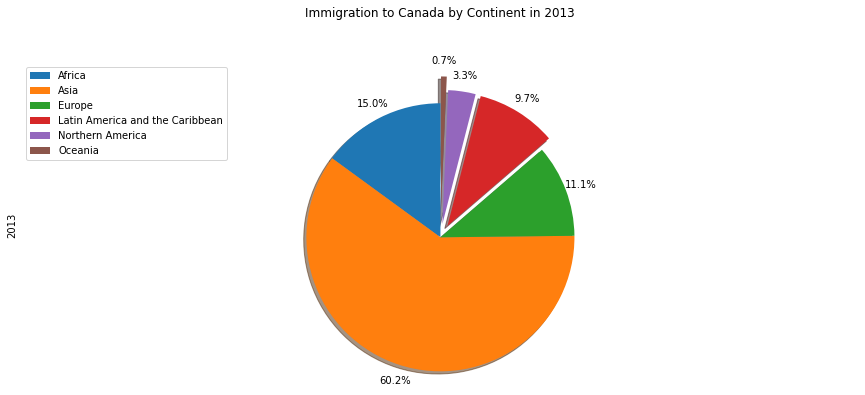

In [19]:
# Plot pie chart by continent
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] 

df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 
                                pctdistance=1.12,            
                                explode=explode_list         
                                )

plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

Asia is the continent with the largest amount of immigration at 60.2%.

## Box Plots <a name="bp"></a>


Box plots are a simply way to visualize the shape of our data. This chart depicts a group of numerical data through quartiles.

**Question:** What is the distribution of Australia's immigration between 1980 - 2013?

In [20]:
# create Australia specific dataframe and transpose data to fit plot
df_Australia = df.loc[['Australia'], years].transpose()
df_Australia.head()

Country,Australia
1980,702
1981,639
1982,484
1983,317
1984,317


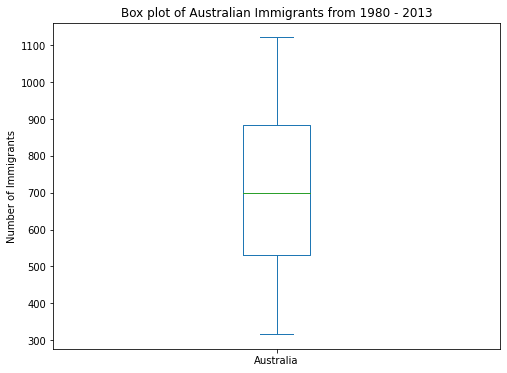

In [21]:
# Plot Australia Boxplot
df_Australia.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Australian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [22]:
# View summary statistics 
df_Australia.describe()

Country,Australia
count,34.000000
mean,700.852941
std,228.797533
min,317.000000
25%,530.500000
50%,700.500000
75%,883.500000
max,1121.000000


The boxplot of immigrations in Australia visually represents most of the summary statistics in the above output. The bottom of the boxplot represents the smallest immigration value at 317 and the top represents the largest value of 1121.

## Scatter Plots <a name="sp"></a>


Scatter plots are preferred while comparing the data variables to determine the relationship between dependent and independent variables.

**Question:** What is the visual trend of all immigrations to Canada?

In [23]:
# create new column to sum data by year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


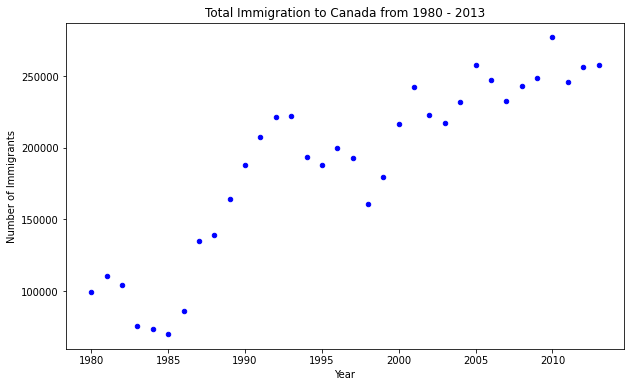

In [24]:
# Plot data using scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We observe an upward trend in the data, as time goes on, the total number of immigrants increase. This indicates a linear relationship and can be assessed by plotting a regression line. 

## Bubble Plots <a name="bp"></a>


Bubble plots are used to explore the relationship between two variables where the size of each symbol, or bubble, represents the size of a third variable.

**Question:** How does immigrations compare between South American neighbors, Peru and Brazil?

In [25]:
# transposed dataframe
df_can_t = df[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [26]:
# normalize Peru data
norm_Peru = (df_can_t['Peru'] - df_can_t['Peru'].min()) / (df_can_t['Peru'].max() - df_can_t['Peru'].min())

# normalize Brazil data
norm_Brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

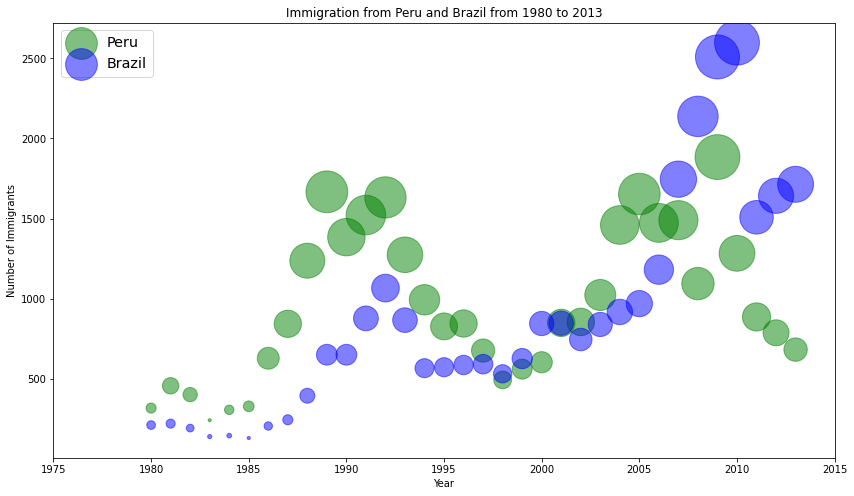

In [27]:
# Plot Peru data
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Peru',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_Peru * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Plot Brazil data
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    alpha=0.5,
                    color="blue",
                    s=norm_Brazil * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Peru and Brazil from 1980 to 2013')
ax0.legend(['Peru', 'Brazil'], loc='upper left', fontsize='x-large')

Peru has consistently maintained more immigrations than Brazil from 1980 through approximately 2009. Then, immigrations in Brazil started to trend higher than Peru from then on.

## Generating Maps <a name="gmap"></a>


Python can be utilized to generate various types of maps. The maps in this section will display vacation rental data extracted from the city of New Orlean's website.

In [28]:
# Read in data extracted from website
url = "https://raw.githubusercontent.com/dandersonghub/Data-Visualization/main/NOLA.csv"
nola_df = pd.read_csv(url)

# Drop rows with missing data
nola_df = nola_df.dropna()

In [29]:
# Reivew dataframe for analysis 
nola_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255 entries, 0 to 2656
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2255 non-null   object 
 1   Address          2255 non-null   object 
 2   Type             2255 non-null   object 
 3   Bedroom limit    2255 non-null   float64
 4   Guest limit      2255 non-null   float64
 5   Expiration date  2255 non-null   object 
 6   Location         2255 non-null   object 
 7   Y                2255 non-null   object 
 8   X                2255 non-null   object 
dtypes: float64(2), object(7)
memory usage: 176.2+ KB


In [30]:
# Review vacation rental by type
nola_df['Type'].value_counts()

Short Term Rental Residential Owner    1312
Short Term Rental Commercial Owner      940
Commercial STR                            2
Accessory STR                             1
Name: Type, dtype: int64

In [31]:
# Create dataframe of the first 100 rental locations
limit = 100
df_rentals = nola_df.iloc[0:limit, :]

In [32]:
# View first 5 rows of data
df_rentals.head()


,Name,Address,Type,Bedroom limit,Guest limit,Expiration date,Location,Y,X
0,516 S Dorgenois St,516 S Dorgenois St,Short Term Rental Commercial Owner,2.0,5.0,11/11/2022 23:59,"(29.9606030466068, -90.0892656704537)",29.9606030466068,-90.0892656704537
1,1210 S Rampart St Unit 1B,1210 S Rampart St Unit 1B,Short Term Rental Residential Owner,2.0,4.0,6/27/2023 23:59,"(29.9436221825203, -90.0784593414273)",29.9436221825203,-90.0784593414273
2,624 S Miro St,624 S Miro St,Short Term Rental Commercial Owner,5.0,10.0,11/11/2022 23:59,"(29.9580154964913, -90.0871467011987)",29.9580154964913,-90.0871467011987
3,1030 Kerlerec St Apt 3,1030 Kerlerec St Apt 3,Short Term Rental Commercial Owner,2.0,4.0,11/10/2022 23:59,"(29.9663236986569, -90.0626983550869)",29.9663236986569,-90.0626983550869
4,518 S Dorgenois St,518 S Dorgenois St,Short Term Rental Commercial Owner,2.0,4.0,11/11/2022 23:59,"(29.9605816137577, -90.0892762017721)",29.9605816137577,-90.0892762017721


In [33]:
# Create base layer of map, New Orleans latitude and longitude values
latitude = 29.951065
longitude = -90.071533

In [34]:
# Create map of New Orleans, Louisiana and display it
nola_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of New Orleans
nola_map

In [36]:
# Plot rental locations on city map
# create a feature group for the rentals in the dataframe
rentals = folium.map.FeatureGroup()

# loop through the 100 locations and add each to the rentals feature group
for lat, lng, in zip(df_rentals.Y, df_rentals.X):
    rentals.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add rental locations to map
nola_map.add_child(rentals)

This map displays a selection of 100 vacation rentals in New Orleans, Louisiana. The locations of each rental were extracted from a publically available dataset on the city's website. 